# Computational Methods in Economics

## Lecture 5 - Numerical Optimization

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2017-11-20 18:49:04.892764


### Preliminaries

#### Import Modules

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import scipy.optimize

# import sys
from importlib import reload

--------------------------------------------------------------------------------------------------------------------------------
<a id = 'introduction'></a>

## Introduction

Optimization (minimization or maximization) is at the heart of almost all economic models, which makes numerical algorithms for optimization an essential part of an economist's computational toolbox. Before talking about these algorithms in detail, we start with a short refresher on the theory behind optimization.

### Review: Unconstrained Optimization

Unconstrained optimization entails *minimizing* an (scalar) *objective function* $f: \mathbb{R}^n \rightarrow \mathbb{R}$:

\begin{equation}
    \min_{x} f(x)
\end{equation}

with
\begin{equation}
    x \in \mathbb{R}^n
\end{equation}
and $f$ being a smooth function.

Note that we frame the problem here in terms of minimization, mainly because that's how the Scipy implementations that we will see do it. *Maximizing* a function is equivalent to minimizing its negative.

Usually, we want to find a *global* minimum and hence a *global minimizer* of $f$. Formally, a global minimizer for the problem above is a point $x^*$ if $f(x^*) \le f(x)$ for all $x$ in the relevant domain. 

However, most algorithms developed for numerical optimization (and in fact all algorithms discussed in this class) aim to find a local optimum, and hence a *local minimizer*. A local minimizer is a point $x^*$ if there is a neighborhood $\mathcal{N}$ of $x^*$ such that $f(x^*) \le f(x)$ for all $x$ in $\mathcal{N}$. For a *strict* or *strong* local minimizer, the inequality is strict. If $x^*$ is the only local minimizer in $\mathcal{N}$, it is also called an *isolated* minimizer. All isolated local minimizers are strict, however strict minimizers are not always isolated.

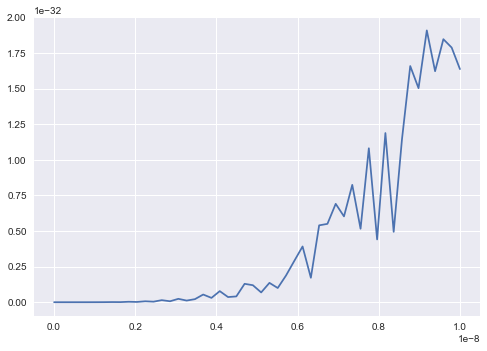

In [24]:
f = lambda x: np.cos(x**(-1)) * x**4  + 2 * x**4
x = np.linspace(1e-12, 1e-8, 50)
plt.plot(x, f(x))

Why do the methods below focus on local minimizers? The more points an algorithm has to "visit" (i.e. evaluate the function), the more computer time and/or storage it needs, which we aim to keep as small as possible. To find a global minimizer, we would need to sample points over the whole relevant domain of $f$. However, note if we know that a function is *convex*, a local minimizer is also a global minimizer 

How do we recognize a local minimum? We rely on the following necessary and sufficient conditions (that you have probably used in almost every economics class you've ever taken):
- If $x^*$ is a local minimizer of $f$ and $f$ is continuously differentiable in an open neighborhood around $x^*$, then the *gradient* $\nabla f(x^*)$ is zero. For a univariate function, $f'(x^*) = 0$.
- If $x^*$ is a local minimizer and $\nabla^2 f$ exists and is continuous in an open neighborhood around $x^*$, then $\nabla f(x^*) = 0$ and $\nabla^2 f(x^*)$ is positive semidefinite.
- Suppose that $\nabla^2 f$ is continuous in an open neighborhood around $x^*$ and that $\nabla f(x^*) = 0$ and $\nabla^2 f(x^*)$ is positive semidefinite. Then $x^*$ is a strict local minimizer of $f$.

--------------------------------------------------------------------------------------------------------------------------------
<a id = 'golden'></a>

## Golden Search

Similar to root finding, for performing numerical optimization we have both derivative-free methods as well as algorithms that either rely on analytical derivatives provided by the user or approximate the derivatives numerically. First, we look at an important method for maximizing a *univariate* function without using derivates, namely *golden (section) search*.

Conceptually, golden search is similar to bisection: we bracket the minimum $x^*$ by the interval $[a, b]$ and then sequentially reduce the length of the interval. One important difference to bisection is that we need to evaluate the function at *two* points inside the bracket, rather than one as in the case of bisection. This is illustrated by the following example:  

In [3]:
## cp. figure in class
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#

The obvious question is then how to choose the *search points* $c$ and $d$ inside the bracket. Golden search prescribes the following rule:
\begin{align}
    c &= a + r (b - a) \\
    d &= b - r (b - a)
\end{align}
where
\begin{equation}
    r = \frac{3 - \sqrt{5}}{2} \approx 0.382...
\end{equation}    

This satisfies two criteria:

- The new interval always has the same length, independent whether the upper or lower bound is replaced:

\begin{equation}
       b - c = d - a = (1 - r)(b - a) 
\end{equation}   

- For every refinement after the first, one of the search points equals the search point from the previous refinement that was not used as a new bound; in other words,

    1. if $f(c) < f(d)$, the new interval is $[a, d]$; for the next refinement, $d' = c$
    2. if $f(c) > f(d)$, the new interval is $[c, b]$; for the next refinement, $c' = d$

This has the advantage that only one function evaluation is performed per iteration; e.g. in the first case, we need to evaluate $f(c')$, but we already have evaluated $f(d') = f(c)$ for the previous refinement. 

In Python, golden section search for minimizing a univariate function is implemented in **scipy.optimize.golden**. Below, we apply it on the function $f(x) = - \exp(-x) \sin(x)$:

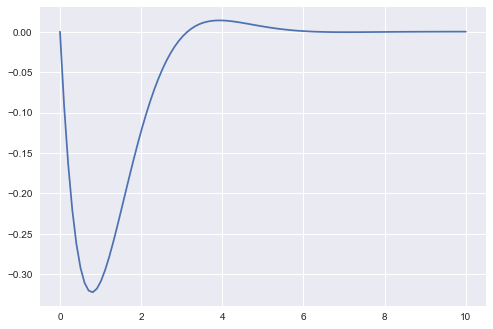

In [3]:
f = lambda x: -np.exp(-x) * np.sin(x)
x = np.linspace(0, 10, 100)
plt.plot(x, f(x))

In [4]:
scipy.optimize.golden(f, brack = (0, 2))

0.7853981651501754

We will not use golden search very often, for the simple reason that we usually optimize over functions with more than one variable. However, golden search is useful in the case of univariate functions with derivatives that are irregular or computationally costly to evaluate.

--------------------------------------------------------------------------------------------------------------------------------
<a id = 'Nelder-Mead'></a>

## Nelder-Mead (Simplex)

Compare http://www.benfrederickson.com/numerical-optimization/ for a visualization.

#### Example: "Banana" function

In [5]:
def banana(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

In [6]:
scipy.optimize.minimize(banana, [0, 1], method = 'Nelder-Mead')

 final_simplex: (array([[ 1.00000205,  1.00000565],
       [ 0.99996743,  0.99993257],
       [ 0.99996276,  0.99992823]]), array([  2.42887199e-10,   1.58293615e-09,   2.11970761e-09]))
           fun: 2.4288719914788363e-10
       message: 'Optimization terminated successfully.'
          nfev: 191
           nit: 101
        status: 0
       success: True
             x: array([ 1.00000205,  1.00000565])

Similar to golden search in the univariate case, use the Nelder-Mead algorithm only in cases where a single optimization is performed and evaluating the function and its derivatives is costly. Nelder-Mead is slow and unreliable, in particular for problems with more than two dimensions. In those cases, we are better off with using a variant of the Newton-Raphson method.

--------------------------------------------------------------------------------------------------------------------------------
<a id = 'Newton'></a>

## Newton-Raphson

--------------------------------------------------------------------------------------------------------------------------------
<a id = 'NGM'></a>

## Example: Solving the Neoclassical Growth Model 

As an application of unconstrained optimization over many variables, let's go back the neoclassical growth model. As a reminder, here a concise description of the model: 

- Utility function:

\begin{equation}
    u(c, h) = \frac{c^{1-\nu}}{1-\nu} - B \frac{h^{1+\eta}}{1+\eta}
\end{equation}

with $c$ denoting consumption and $h$ labor supply.

- Production function:

\begin{equation}
    f(k, h) = A k^\alpha h^{1-\alpha}
\end{equation}
with $k$ denoting the capital stock, and $\theta$ a productivity shock.

- Resource Constraint:

\begin{equation}
    k_{t+1} + c_t = f(k_t, h_t) + (1 - \delta) k_t = A k_t^\alpha h_t^{1-\alpha} + (1 - \delta) k_t
\end{equation}

- Planner's Problem:

\begin{equation}
    \max_{\left\{c_t, k_{t+1}, h_t\right\}} \sum^\infty_{t = 0} \beta^t u(c_t, h_t) 
\end{equation}
s.t. the resource constraint.


One obvious issue when trying to solve this model using finite-dimensional optimization is that the version of the model above has an infinite time horizon, and hence infinitely many variables (two per period). There are usually two workarounds: either you solve the model with a finite time horizon $T$ - that is, the economy ends after $T$ periods - but make $T$ large. In this case, we would hope that the economy reaches its steady long before $T$ and hence we can disregard the last few periods. Alternatively, we can include a "continuation value", i.e. impose some conditions on what happens after period $T$. 

In any case, in the simple deterministic NGM with time horizon $T$, we have $2T$ choice variables: in each period, the solution needs to specify a $k_{t+1}$ and a $h_t$.  


#### Parameters

In [7]:
## utility
beta = 0.8      # discount factor
nu = 2       # risk-aversion coefficient for consumption
eta = 1         # elasticity parameter for labor supply
eps = 1e-6      # lower bound of consumption and labor supply
## production
alpha = 0.25
delta = 0.1
## derived
A = (1 - beta * (1 - delta))/(alpha*beta) # normalization parameter for production function => steady state k = 1
B = (1 - alpha) * A * (A - delta)**nu      # parameter for utility function
## initial capital stock
k0 = 0.8

#### Compute steady state (from last lecture)

In [8]:
def cd(x, alpha, A):
    """
    Evaluates the Cobb-Douglas function with coefficient alpha and shift parameter A, for two inputs (x)
    """
    return A * x[0]**alpha * x[1]**(1 - alpha)

def cd_diff(x, alpha, A):
    """
    Evaluates the first derivatives (returned as a tuple) of the Cobb-Douglas function with coefficient alpha and shift parameter A, for two inputs (x)
    """
    return (alpha * cd(x, alpha, A) / x[0], (1 - alpha) * cd(x, alpha, A) / x[1])

def steady(x):
    """
    Returns the vector-valued function consisting of the steady-state conditions 
    """
    y = np.zeros(2)
    mp = cd_diff(x, alpha, A)
    
    y[0] = beta * (mp[0] + 1 - delta) - 1
    y[1] = (cd(x, alpha, A) - delta * x[0])**(-nu) * mp[1] - B * x[1]**eta
    
    return y

## solve for steady state
x0 = np.array([1, 1])
res = scipy.optimize.root(steady, x0,  tol = 1e-8, method = "broyden1")
kss, hss = res.x 

print(res.success)
print(kss, hss)


True
0.704815636211 0.704815636211


#### Define Functions

In [9]:
def cd(x, y):
    """
    Evaluates the Cobb-Douglas function with coefficient alpha and shift parameter A, for two inputs (x)
    """
    return A * x**alpha * y**(1 - alpha)

def u(c, h):
    """
    Utility function
    """
    return c**(1 - nu)/(1 - nu) - B * h**(1 + eta)/(1 + eta)

def objective(x):
    """
    Objective function: lifetime utility
    """
    kp = x[:int(len(x)/2)]
    h = x[int(len(x)/2):]

    k = np.insert(kp[:T-1], 0, k0)
    
    return - ( beta**(np.array(range(T))) @ u( cd(k, h) + (1 - delta) * k - kp, h) 
              + (beta**T/(1 - beta)) *  u( cd(kp[-1], h[-1]) - delta * kp[-1], h[-1]) )

#### Solve model and plot decision variables over time

In [10]:
T = 30

## set bounds
bnds = []
for ind in range(2 * T):
    bnds.append((1e-12, 10000))

## set initial guess    
x0 = np.concatenate([kss * np.ones(T), hss * np.ones(T)])

## solve model
res = scipy.optimize.minimize(objective, x0, method = 'L-BFGS-B', bounds = bnds, tol = 1e-12)
print(res.message)
print(res.success)
x = res.x
kp = x[:int(len(x)/2)]
h =  x[int(len(x)/2):]

b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
True


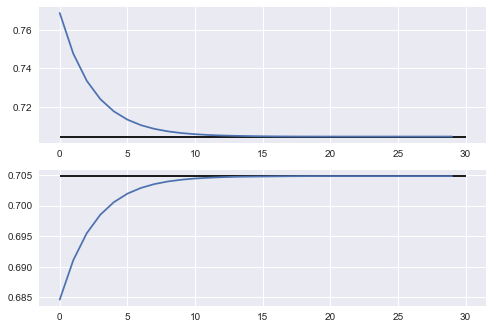

In [11]:
fig, ax = plt.subplots(2,1)
ax[0].plot(kp)
ax[1].plot(h)
ax[0].hlines(kss, 0, T)
ax[1].hlines(hss, 0, T)


#### Example Judd, p. 106

In [20]:
### functions and parameters
alpha = 0.98
eta = 0.85

cy = 0.62
cz = 0.6

Cy = lambda x : cy * x
Cz = lambda x : cz * x

def u(Y, Z):
    return (Y**alpha + Z**alpha)**(eta/alpha)

def ud(Y, Z):
    return eta * (Y**alpha + Z**alpha)**(eta/alpha - 1) * Y**(alpha - 1)

def obj(x):
    
    Y = np.exp(x[0])
    Z = np.exp(x[1])
    
    return - (Y * ud(Y, Z) + Z * ud(Z, Y) - Cy(Y) - Cz(Z))

In [22]:
x0 = np.zeros(2)
res = scipy.optimize.minimize(obj, x0, method = 'BFGS', tol = 1e-12)
print(res)

      fun: -0.3731764300060745
 hess_inv: array([[ 953.18473656, -636.48172799],
       [-636.48172799,  425.16859319]])
      jac: array([ 0.,  0.])
  message: 'Optimization terminated successfully.'
     nfev: 152
      nit: 18
     njev: 38
   status: 0
  success: True
        x: array([-0.56254632,  1.07694443])


In [23]:
import statsmodels.api as sm

sm.tools.numdiff.approx_fprime(res.x, obj)

array([ 0.,  0.])

In [37]:
sm.tools.numdiff.approx_hess3(res.x, obj)

array([[ 0.01473617,  0.03825115],
       [ 0.03825115,  0.22596142]])

In [36]:
dist = 1
eps = 1e-8
x = np.array([1.5, 2])
maxit = 15
it = 0
while dist > eps and it < maxit:
    it += 1
    g = sm.tools.numdiff.approx_fprime(x, obj)
    H = sm.tools.numdiff.approx_hess3(x, obj)
    
    s = scipy.linalg.solve(H, -g)
    
    dist = np.linalg.norm(s) / (1 + np.linalg.norm(x))
    print(s, dist)
    x = x + s
    

[-0.60757231 -0.55716823] 0.235533360122
[-0.47758966 -0.36881462] 0.223777180408
[-0.363956   -0.11269843] 0.177100606851
[-0.33464959  0.07464413] 0.174697873963
[-0.20346787  0.03171744] 0.099282939784
[-0.06844258  0.00848739] 0.0317292921423
[-0.00680684  0.00076989] 0.00309802766798
[ -6.66382154e-05   7.66846341e-06] 3.02837502187e-05
[-0. -0.] 0.0


In [39]:
x

array([-0.5625515 ,  1.07694523])